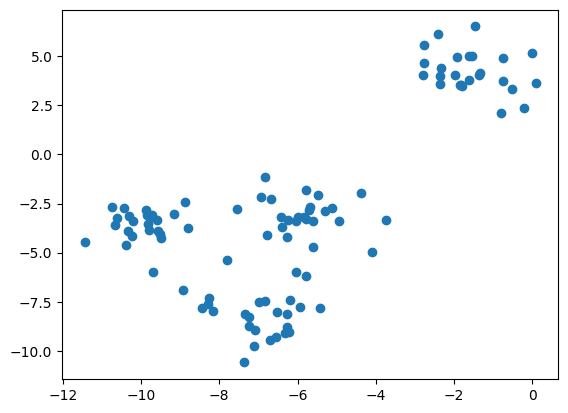

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances

X,y = datasets.make_blobs(n_samples=100, centers = 4, random_state = 1 )

plt.scatter (X[:,0], X[:,1])
plt.show()


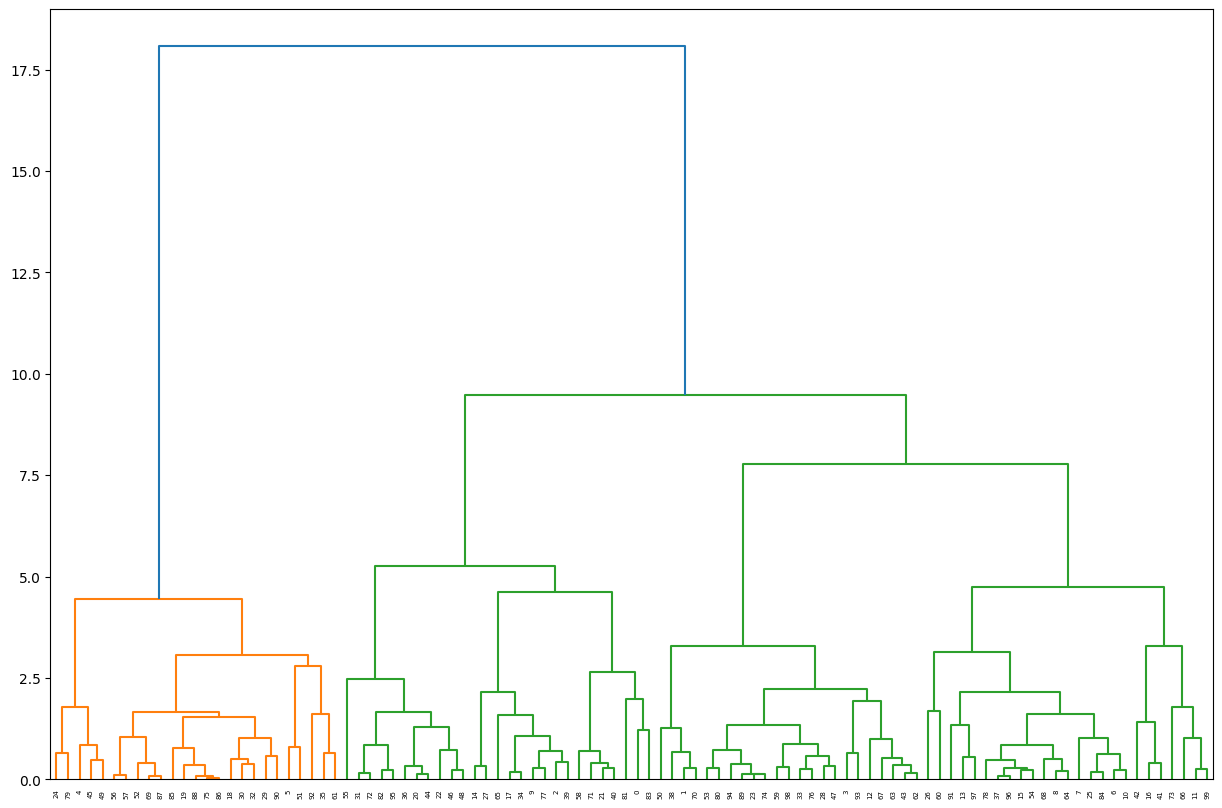

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
 

# Реализация иерархической кластеризации при помощи функции linkage

mergings = linkage(X, method='complete')
 
# Строим дендрограмму, указав параметры удобные для отображения

plt.figure(figsize=(15, 10))
dendrogram(mergings)
plt.show()
 


In [3]:
T = fcluster (mergings,7, 'distance')
print (T)

[2 3 2 3 1 1 4 4 4 2 4 4 3 4 2 4 4 2 1 1 2 2 2 3 1 4 4 2 3 1 1 2 1 3 2 1 2
 4 3 2 2 4 4 3 2 1 2 3 2 1 3 1 1 3 4 2 1 1 2 3 4 1 3 3 4 2 4 3 4 1 3 2 2 4
 3 1 3 2 4 1 3 2 2 2 4 1 1 1 1 3 1 4 1 3 3 2 4 4 3 4]


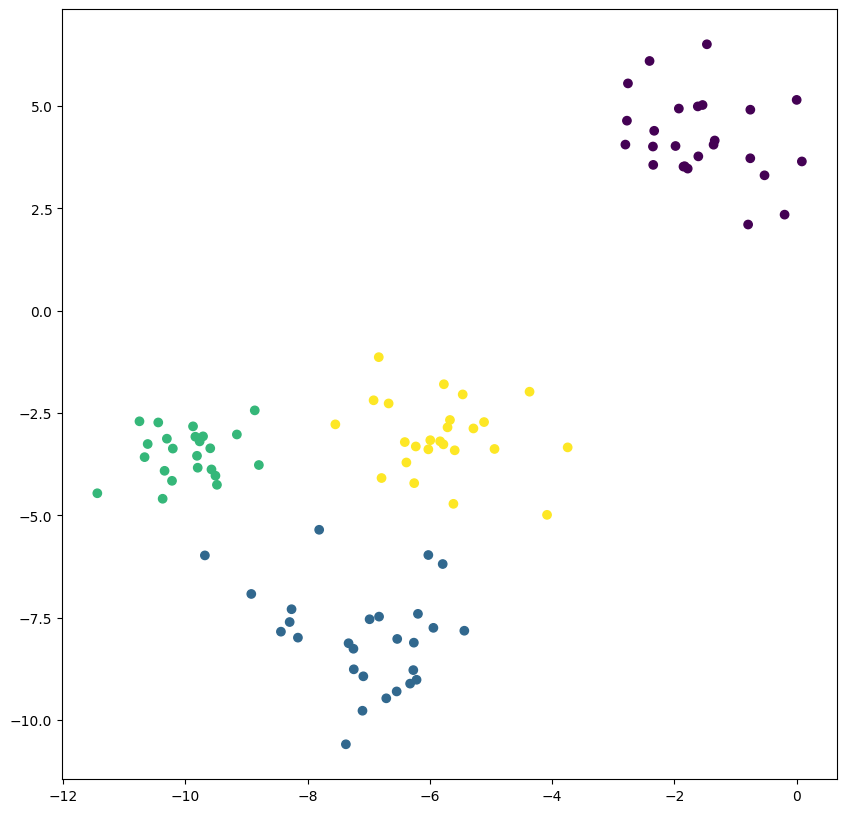

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter (X[:,0], X[:,1], c=T)
plt.show()


In [5]:
def update_cluster_centers(X, c):
    ix = np.where(c==1)
    mu[0,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==2)
    mu[1,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==3)
    mu[2,:] = np.mean(X[ix,:], axis=1)
    ix = np.where(c==4)
    mu[3,:] = np.mean(X[ix,:], axis=1)
    return mu

In [6]:
mu = np.array([[0.0,0], [0,0], [0,0], [0,0]])
mu = update_cluster_centers(X, T)
print(mu)

[[-1.56129966  4.21898437]
 [-7.07614521 -7.97322589]
 [-9.96347347 -3.48454825]
 [-5.80277079 -3.06555518]]


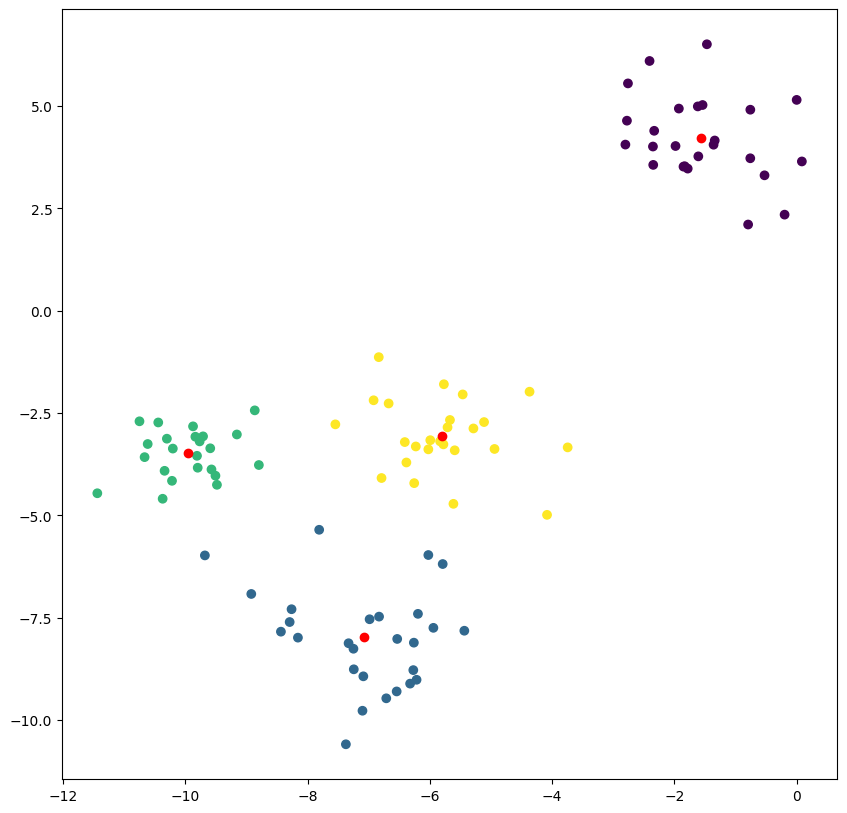

In [7]:
plt.figure(figsize = (10,10))
plt.scatter (X[:,0], X[:,1], c=T)
plt.scatter(mu[:,0],mu[:,1], c = 'red', marker = 'o')
plt.show()

In [8]:
c1 = np.where(T==1)
print ('objects of cluster #i:' ,c1)
s = np.mean(X[c1,0])
print (s)
print ('Dataset: ' ,X)

print('centroids: ' ,mu)
print('Number of centroids:', np.shape(mu)[0])
print('Number of obj in cluster #i:', np.shape(c1)[1]) 

objects of cluster #i: (array([ 4,  5, 18, 19, 24, 29, 30, 32, 35, 45, 49, 51, 52, 56, 57, 61, 69,
       75, 79, 85, 86, 87, 88, 90, 92], dtype=int64),)
-1.5612996617417532
Dataset:  [[-8.92286405e+00 -6.91706407e+00]
 [-1.02200406e+01 -4.15410662e+00]
 [-6.19599603e+00 -7.40281646e+00]
 [-8.86608312e+00 -2.43353173e+00]
 [ 8.52518583e-02  3.64528297e+00]
 [-7.57969185e-01  4.90898421e+00]
 [-5.11445720e+00 -2.71929274e+00]
 [-4.94333866e+00 -3.37609332e+00]
 [-6.41124052e+00 -3.20783965e+00]
 [-6.26302115e+00 -8.10666081e+00]
 [-5.28846058e+00 -2.87525156e+00]
 [-6.92171246e+00 -2.18729857e+00]
 [-8.79879462e+00 -3.76819213e+00]
 [-6.25738636e+00 -4.21080419e+00]
 [-5.79112625e+00 -6.18612636e+00]
 [-5.99413070e+00 -3.16189816e+00]
 [-5.77161096e+00 -1.79555958e+00]
 [-6.98706106e+00 -7.53484784e+00]
 [-2.33080604e+00  4.39382527e+00]
 [-1.60875215e+00  3.76949422e+00]
 [-6.21872154e+00 -9.01274405e+00]
 [-8.43799950e+00 -7.83806871e+00]
 [-7.10357769e+00 -9.76900046e+00]
 [-9.837675

In [9]:
#Сумма квадратов расстояний до центроида

#print (X[c1,:])
print(c1)

print(np.shape(c1)[1])
#print ( 'dist between 2 points', euclidean_distances(X[c1[0][0],:].reshape(1,-1), X[c1[0][3],:].reshape(1,-1)))
cluster_dist=0
for j in range(0, np.shape(mu)[0]):
    summ = 0
    obj = np.where(T==j+1)
    for i in range(0, np.shape(obj)[1]):
        #print(euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))
        summ = summ + (euclidean_distances(mu[j].reshape(1,-1), X[obj[0][i],:].reshape(1,-1)))**2
    if(summ>0):
        summ = summ
    cluster_dist = cluster_dist + summ
    print(j,' custer dist: ', summ)
print ("Summary of squared cluster dist: ", cluster_dist)



(array([ 4,  5, 18, 19, 24, 29, 30, 32, 35, 45, 49, 51, 52, 56, 57, 61, 69,
       75, 79, 85, 86, 87, 88, 90, 92], dtype=int64),)
25
0  custer dist:  [[43.11598405]]
1  custer dist:  [[67.14489804]]
2  custer dist:  [[16.25475117]]
3  custer dist:  [[38.36151505]]
Summary of squared cluster dist:  [[164.87714831]]


# K-means

In [10]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=3)
model.fit(X)
all_predictions = model.predict(X)
print (all_predictions)

[2 0 2 0 1 1 0 0 0 2 0 0 0 0 2 0 0 2 1 1 2 2 2 0 1 0 0 2 0 1 1 2 1 0 2 1 2
 0 0 2 2 0 0 0 2 1 2 0 2 1 0 1 1 0 0 2 1 1 2 0 0 1 0 0 0 2 0 0 0 1 0 2 2 0
 0 1 0 2 0 1 0 0 2 0 0 1 1 1 1 0 1 0 1 0 0 2 0 0 0 0]


C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


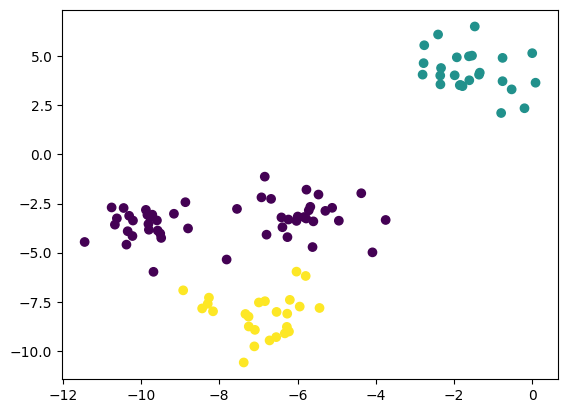

In [23]:
plt.scatter (X[:,0], X[:,1], c=all_predictions)
plt.show()

In [13]:
print('Sum of squared distances of samples to their closest cluster center.:', model.inertia_)

Sum of squared distances of samples to their closest cluster center.: 766.1594927527818


In [14]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append((kmeans.inertia_))
print (inertia)

C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[3015.7692276196085, 766.1594927527818, 369.5556880065657, 158.76686919578418, 136.07776106430828, 119.41082903949317, 102.06541733084515, 90.40896447881985, 79.46925530063092]


<function matplotlib.pyplot.show(close=None, block=None)>

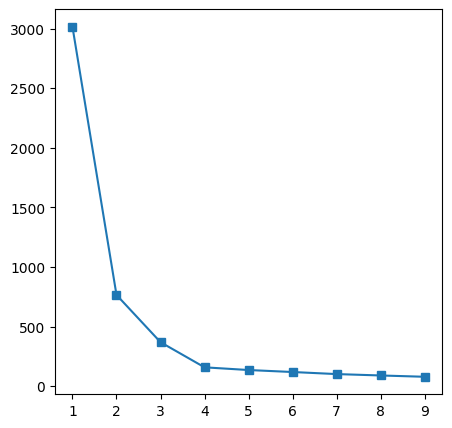

In [15]:
plt.figure(figsize=(5,5))
plt.plot(range (1,10), inertia, marker='s')

plt.show

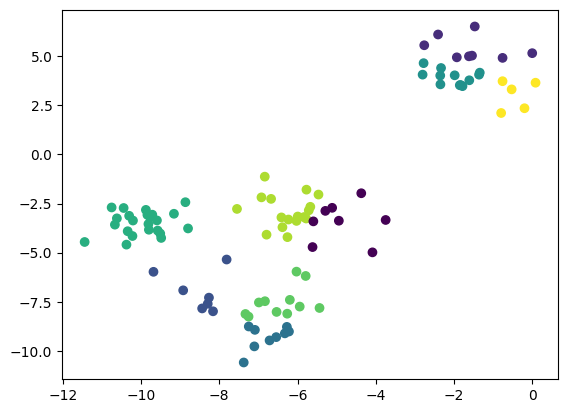

In [16]:
plt.scatter (X[:,0], X[:,1], c=kmeans.predict(X))
plt.show()